In [1]:
import matplotlib as plot
import numpy as np

import book_format
book_format.set_style()
import kf_book.gh_internal as gh

In [2]:
#implement
#estimate = prediction + 0.4 (measurement - prediction)
#iterate for 10 days
w_0 = 160
w_z = [158.0, 164.2, 160.3, 159.9, 162.1,
       164.6, 169.6, 167.4, 166.4, 171.0]
t = 1
w_e = []
w_e.append(w_0)
p_all = []
print(1)
for i in range((len(w_z) )):
       p = w_e[i] + 1
       p_all.append(p)
       w_e_i = p + 0.4 * (w_z[i] - p)
       w_e.append(w_e_i)

print(w_e)


[160, 159.8, 162.16, 162.016, 161.7696, 162.50176, 163.941056, 166.8046336, 167.64278016, 167.745668096, 169.6474008576]


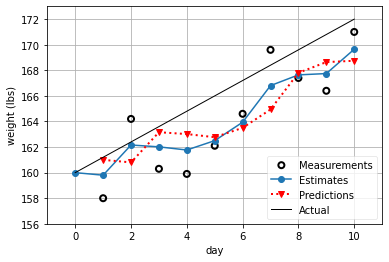

In [3]:
#plot
book_format.set_figsize(10)
gh.plot_gh_results(w_z, w_e, p_all, [160,172])

-1.3333333333333333
0.977777777777779
0.7385185185185226
0.2154567901234543
0.5631341563785952
1.4173625240054832
3.1241120365797883
2.3734577319311163
0.7985792384982064
1.120792396272388
[158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0]
[160, 158.6, 160.04, 160.73066666666668, 160.84151111111112, 161.47418074074074, 163.0623889382716, 166.52785087736623, 168.7511777483676, 169.23478128817925, 170.42001631600647]
[159.0, 157.26666666666665, 161.01777777777778, 161.4691851851852, 161.05696790123457, 162.03731489711933, 164.47975146227708, 169.65196291394602, 171.12463548029874, 170.03336052667746]


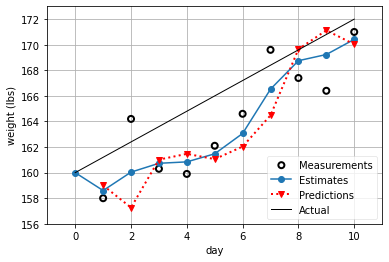

In [4]:
#implement when gain varies
#new gain = old gain + 1/3 * measurement - predicted weight

delta_gain = -1.0

weight = 0.4

w_z = [158.0, 164.2, 160.3, 159.9, 162.1,
       164.6, 169.6, 167.4, 166.4, 171.0]
w_0 = 160
w = w_0 #w variable=

predictions = []
estimations = []
gains = []
estimations.append(w)

for z in w_z:
       #prediction
       w = w + delta_gain
       gains.append(delta_gain)

       predictions.append(w)

       #update with measurement
       residual = z - w
       estimate = w + weight * residual
       w = estimate


       delta_gain = delta_gain + 1. / 3 * residual
       print(delta_gain)

       estimations.append(estimate)

print(w_z)
print(estimations)
print(predictions)
gh.plot_gh_results(w_z, estimations, predictions, [160,172])


In [5]:
print(gains)

[-1.0, -1.3333333333333333, 0.977777777777779, 0.7385185185185226, 0.2154567901234543, 0.5631341563785952, 1.4173625240054832, 3.1241120365797883, 2.3734577319311163, 0.7985792384982064]


[158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
[159.2   161.8   162.1   160.78  160.985 163.311 168.1   169.696
 168.204 169.164 170.892 172.629]


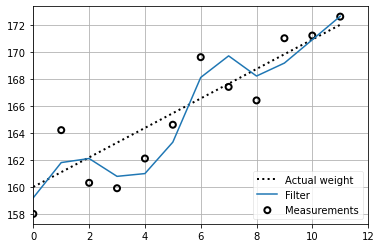

In [6]:
import kf_book.book_plots as book_plots
from kf_book.gh_internal import plot_g_h_results
zs = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
#write generic algo
def gh_filter(data, x0, dx, g, h, dt=1):
       #data = measurements to be filtered
       #x0 = initial state
       #dx = initial change
       #g  = g scale factor
       #h  = h scale factor
       #dt = time_step
       x = x0
       estimates = []

       for what in data:
           #predict
           x = x + dx * dt
           dx = dx

           #update
           dx = dx + h * (what - x) / dt
           x = x + g * (what - x)
           estimates.append(x)

       return np.array(estimates)

book_plots.plot_track([0, 11], [160, 172], label='Actual weight')
data = gh_filter(data=zs, x0=160, dx=1, g=6./10, h=2/3, dt=1)
plot_g_h_results(measurements=zs, filtered_data=data)
print(zs)
print(data)

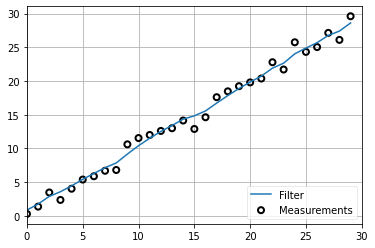

In [7]:
from numpy.random import randn

def generate_random_data(x0, dx, count, noise_factor):
    #randn() output random number near 1 (sigma = 1)
    #noise_factor represent to what extend the noise is
    return [x0 + dx*i + randn() * noise_factor for i in range(count)]

measurement = generate_random_data(x0=0, dx=1, count=30, noise_factor=1)
data = gh_filter(data=measurement, x0=0, dx=1, dt=1, g=0.2, h=0.01)
plot_g_h_results(measurements=measurement, filtered_data=data)

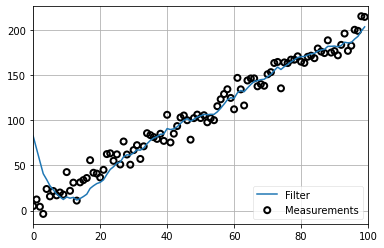

In [8]:
z_data = generate_random_data(x0=5, dx=2, count=100, noise_factor=10)
filtered_data = gh_filter(data=z_data, x0=100, dx=2, dt=1, g=0.2, h=0.02)
plot_g_h_results(measurements=z_data, filtered_data=filtered_data)

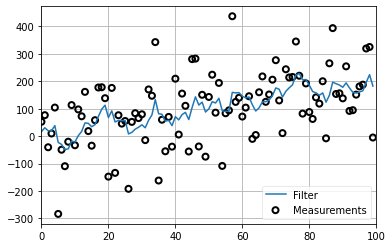

In [9]:
z_data = generate_random_data(x0=5, dx=2, count=100, noise_factor=100)
filtered_data = gh_filter(data=z_data, x0=5, dx=2, dt=1, g=0.2, h=0.02)
plot_g_h_results(measurements=z_data, filtered_data=filtered_data)

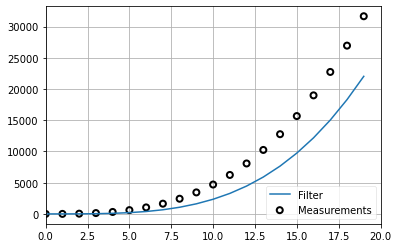

In [10]:
def generate_random_data_const_accleration(x0,dx,count, noise_factor, acc):
    result = []
    x = x0
    for t in range(count):
        #x = xi + vi * t + 0.5  * acc * t^2
        x = x + dx * t + 0.5 * acc * t**2 + randn() * noise_factor
        dx = acc * t
        result.append(x)

    return result
z_s = generate_random_data_const_accleration(x0=10, dx=0, count=20, noise_factor=0, acc=9)
filtered_data = gh_filter(data=z_s, x0=10, dx=0, g=0.2, h=0.02)
plot_g_h_results(measurements=z_s, filtered_data=filtered_data)

In [11]:
print(z_s)

[10.0, 14.5, 50.5, 145.0, 325.0, 617.5, 1049.5, 1648.0, 2440.0, 3452.5, 4712.5, 6247.0, 8083.0, 10247.5, 12767.5, 15670.0, 18982.0, 22730.5, 26942.5, 31645.0]


g scale factor is the factor that weigh the prediction and measurement
`estimate = prediction + g * (measurement - prediction)`
with larger g, the model trust the measurement more

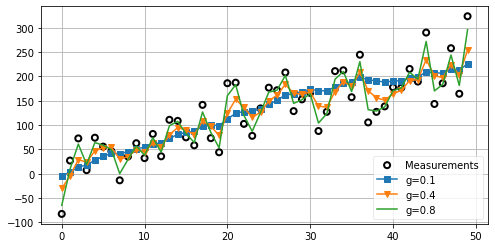

In [12]:
import matplotlib.pyplot as plt
np.random.seed(100)

z_s = generate_random_data(x0=5, dx=5, count=50, noise_factor=50)

data1 = gh_filter(data=z_s, x0=0, dx=5, g=0.1, h=0.01)
data2 = gh_filter(data=z_s, x0=0, dx=5, g=0.4, h=0.01)
data3 = gh_filter(data=z_s, x0=0, dx=5, g=0.8, h=0.01)
with book_plots.figsize(y=4):
    book_plots.plot_measurements(z_s, color='k')
    book_plots.plot_filter(data1, label='g=0.1', marker='s', c='C0')
    book_plots.plot_filter(data2, label='g=0.4', marker='v', c='C1')
    book_plots.plot_filter(data3, label='g=0.8', c='C2')
    plt.legend(loc=4)

h scale factor is the factor that weigh the prediction and measurement
`dx = dx + h * (measurement - prediction)`
with larger h, the model trust the measurement more
larger h, model varies and converge to the measurement more swiftly

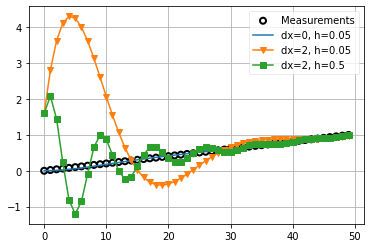

In [13]:
z_s = np.linspace(0, 1, 50)
data1 = gh_filter(data=z_s, x0=0, dx=0, g=0.2, h=0.05)
data2 = gh_filter(data=z_s, x0=0, dx=2, g=0.2, h=0.05)
data3 = gh_filter(data=z_s, x0=0, dx=2, g=0.2, h=0.5)

book_plots.plot_measurements(z_s)
book_plots.plot_filter(data1, label='dx=0, h=0.05', c='C0')
book_plots.plot_filter(data2, label='dx=2, h=0.05', marker='v', c='C1')
book_plots.plot_filter(data3, label='dx=2, h=0.5',  marker='s', c='C2')
plt.legend(loc=1);

# Practice

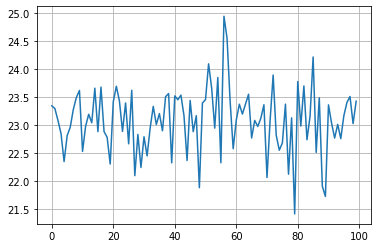

In [20]:
def get_new_pos(pos, vel, dt=1):
    return pos + vel * dt

#with noise being +- 500, add noise
def measure_pos(pos):
    return pos + randn() * 500

def gen_train_data(pos, vel, count):
    zs = []
    for i in range(count):
        p = get_new_pos(pos, vel)
        p = measure_pos(p)
        zs.append(p)
    return np.asarray(zs)

pos, vel = 23000, 15
zs = gen_train_data(pos, vel, 100)
plt.plot(zs/1000)

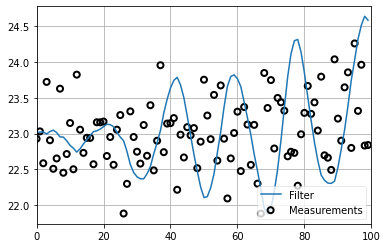

In [26]:
zs = gen_train_data(pos=pos, vel=15, count=100)
data = gh_filter(data=zs,x0=pos, dx=15, g=0.01, h=0.1)
plot_g_h_results(measurements=zs/1000, filtered_data=data/1000)

In [18]:
from filterpy.gh import GHFilter